# Лабораторная работа 4. Подбор параметров и работа с данными

## Линейная регрессия

In [1]:
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def pairplot(df, target):
    ncol, nrow = 7, df.shape[1] // 7 + (df.shape[1] % 7 > 0)
    plt.figure(figsize=(ncol * 4, nrow * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(nrow, ncol, i + 1)
        plt.scatter(df[feature], target, s=10, marker='o', alpha=.6)
        plt.xlabel(feature)
        if i % ncol == 0:
            plt.ylabel('target')

В данном задании мы рассмотрим стандартный датасет для задачи регрессии `Boston Housing`, в котором необходимо предсказать стоимость недвижимости по 13 признакам.

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

feature_lines = urllib.request.urlopen(data_url).readlines()[7:21]
columns = []
for el in feature_lines:
    columns.append(el.split()[0].strip().decode('UTF-8'))

In [4]:
df = pd.read_csv(data_url, sep='\s+', skiprows=21, header=None)

values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

df = pd.DataFrame(data = all_values.reshape(-1, len(columns)), columns = columns)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
y = df["MEDV"]
df = df.drop(columns=["MEDV"])
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


Разделим выборку на обучающую и тестовую в отношении 8/2:

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8, random_state=42)

__Задание 1.__ Обучение линейной регрессии.

Обучите стандартную линейную регрессию, а также с $L_1$ и $L_2$ регуляризаторами (используйте параметры по умолчанию). Посчитайте метрику $R^2$ для каждого метода (метод `score`).

In [7]:
# Стандартная линейная регрессия
model_LR = LinearRegression().fit(x_train, y_train)
model_LR_score = model_LR.score(x_test, y_test)
print('R2 для стандартной линейной регрессии:', model_LR_score)
# Линейная регрессия c L1-регуляризатором (Lasso)
model_L1 = Lasso().fit(x_train, y_train)
model_L1_score = model_L1.score(x_test, y_test)
print('R2 для линейной регрессии c L1-регуляризатором (Lasso):', model_L1_score)
# Линейная регрессия c L2-регуляризатором (Ridge)
model_L2 = Ridge().fit(x_train, y_train)
model_L2_score = model_L2.score(x_test, y_test)
print('R2 для линейной регрессии c L2-регуляризатором (Ridge):', model_L2_score)

R2 для стандартной линейной регрессии: 0.6687594935356274
R2 для линейной регрессии c L1-регуляризатором (Lasso): 0.6671453631686304
R2 для линейной регрессии c L2-регуляризатором (Ridge): 0.666222167016852


__Задание 2.__ Подбор гиперпараметров.

Для Lasso- и Ridge-регресий подберите коэффициент регуляризации по обучающей выборке с помощью кросс-валидации. Параметры для перебора возьмите по логарифмической сетке от $10^{-6}$ до $10^6$).
Также посчитайте метрику $R^2$ для тестовой выборки и сравните с предыдущими результатами. Заметно ли изменилось качество?

Useful: GridSearchCV, RidgeCV, LassoCV

In [10]:
arr_alpha = [10 ** x for x in range(-6, 7)] # Массив значений alpha по логарифмической сетке
params = {'alpha': arr_alpha}
kf =  KFold(n_splits=5, shuffle=True, random_state = 42)
# Обучение модели с L1-регуляризацией с подбором лучшего значения параметра регуляризации при использовании кросс-валидации на пяти разбиениях
model_L1 = GridSearchCV(estimator=Lasso(), param_grid=params, cv=kf).fit(x_train, y_train)
print('Лучшее значение alpha для L1-регуляризации:', model_L1.best_params_['alpha'])
print('R2:', model_L1.score(x_test, y_test))
# Обучение модели с L2-регуляризацией с подбором лучшего значения параметра регуляризации при использовании кросс-валидации на пяти разбиениях
model_L2 = GridSearchCV(estimator=Ridge(), param_grid=params, cv=kf).fit(x_train, y_train)
print('Лучшее значение alpha для L2-регуляризации:', model_L2.best_params_['alpha'])
print('R2:', model_L2.score(x_test, y_test))

Лучшее значение alpha для L1-регуляризации: 0.001
R2: 0.6687912341337344
Лучшее значение alpha для L2-регуляризации: 0.1
R2: 0.6686244122021411


Постройте график зависимости $R^2$ для обучающей и тестовой (на кросс-валидации) выборок в зависимости от значения гиперпараметра. Для Lasso также постройте график зависимости количества ненулевых весов.

In [11]:
model_L1_r2_train = [] # R2 для L1-регуляризации на обучающем наборе
model_L1_r2_val = [] # R2 для L1-регуляризации на валидационном (тестовом на кросс-валидации) наборе
model_L1_coef = [] # Число ненулевых коэффициентов для L1-регуляризации
model_L2_r2_train = [] # R2 для L2-регуляризации на тестовом наборе
model_L2_r2_val = [] # R2 для L2-регуляризации на валидационном наборе
# перебор alpha
for alpha in arr_alpha:
    L1_r2_train = [] # R2 для L1-регуляризации на обучающем наборе для текущего значения alpha
    L1_r2_val = [] # R2 для L1-регуляризации на обучающем наборе для текущего значения alpha
    L2_r2_train = [] # R2 для L1-регуляризации на обучающем наборе для текущего значения alpha
    L2_r2_val = [] # R2 для L1-регуляризации на обучающем наборе для текущего значения alpha
    L1_coef = [] # Число ненулевых коэффициентов для L1-регуляризации для текущего значения alpha
    # Разбивка на 5 частей без пересечений
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for i, (train_index, val_index) in enumerate(kf.split(x_train)): # Для каждого варианта разбивки
        L1 = Lasso(alpha=alpha).fit(x_train.iloc[train_index], y_train.iloc[train_index]) # Обучение модели с L1-регуляризацией
        L1_r2_train.append(L1.score(x_train.iloc[train_index], y_train.iloc[train_index])) # Нахождение R2 на обучающем наборе
        L1_r2_val.append(L1.score(x_train.iloc[val_index], y_train.iloc[val_index])) # Нахождение R2 на валидационном наборе
        L1_coef.append(np.count_nonzero(L1.coef_)) # Нахождение числа ненулевых коэффициентов
        L2 = Ridge(alpha=alpha).fit(x_train.iloc[train_index], y_train.iloc[train_index]) # Обучение модели с L2-регуляризацией
        L2_r2_train.append(L2.score(x_train.iloc[train_index], y_train.iloc[train_index])) # Нахождение R2 на обучающем наборе
        L2_r2_val.append(L2.score(x_train.iloc[val_index], y_train.iloc[val_index])) # Нахождение R2 на валидационном наборе
    # Сохранение средних значений R2 по 5-и вариантам разбивки и числа ненулевых коэффициентов для L1-регуляризации для каждой разбивки
    model_L1_r2_train.append(np.mean(L1_r2_train))
    model_L1_r2_val.append(np.mean(L1_r2_val))
    model_L1_coef.append(L1_coef)            
    model_L2_r2_train.append(np.mean(L2_r2_train))
    model_L2_r2_val.append(np.mean(L2_r2_val))


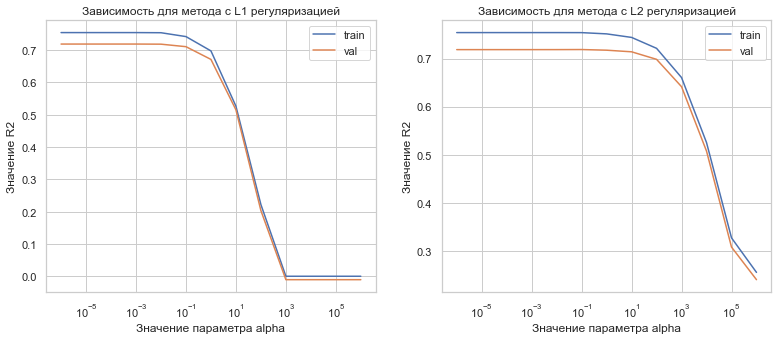

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.semilogx(arr_alpha, model_L1_r2_train, label='train') 
ax1.semilogx(arr_alpha, model_L1_r2_val, label='val')
           
ax1.set_xlabel('Значение параметра alpha')
ax1.set_ylabel('Значение R2')
ax1.set_title('Зависимость для метода с L1 регуляризацией')
ax1.grid(True)
ax1.legend()

ax2.semilogx(arr_alpha, model_L2_r2_train, label='train')
ax2.semilogx(arr_alpha, model_L2_r2_val, label='val')

ax2.set_xlabel('Значение параметра alpha')
ax2.set_ylabel('Значение R2')
ax2.set_title('Зависимость для метода с L2 регуляризацией')
ax2.grid(True)
ax2.legend()

plt.show()

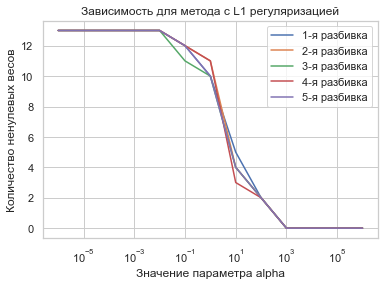

In [13]:
a = np.array(model_L1_coef).T
for i in range(len(a)):
    plt.semilogx(arr_alpha, a[i], label=str(i+1)+'-я разбивка')
plt.xlabel('Значение параметра alpha')
plt.ylabel('Количество ненулевых весов')
plt.title('Зависимость для метода с L1 регуляризацией')
plt.legend()
plt.grid(True)
plt.show()

В какой момент происходит недообучение? Почему?

__Ответ__: При увеличении коэффициента регуляризации уменьшается сложности модели, и точность (R2) снижается. В методе с L1-регуляризацией значительное снижение точности начинается при alpha=0.1 (см. график 1(а)). Также при alpha=0.1 появляются нулевые веса модели (см. 2-ой график). При дальнейшем увеличении значения параметра регуляризации все веса обнуляются, а точность модели (R2) стремится к нулю. В методе с L2-регуляризацией значительное снижение точности начинается при alpha=10 (см. график 1(б)).
Оптимальным значением коэффициента регуляризации, подобранным по кросс-валидации, для обеих моделей является наименьшее из рассматриваемых, то есть лучшей является самая сложная модель из рассматриваемых. Это может говорить о том, что имеет место недообучение и увеличение сложности приведет к увеличению качества предсказания.

---

## Подготовка данных

Как вы могли заметить, большого прироста качества с помощью подбора коэфициента регуляризации добиться не удалось. Поэтому прежде чем бросаться обучать модели, необходимо изучить и предобработать данные.

__Задание 3.__ Масштабирование.

Зачастую признаки в сырых данных имеют разный масштаб. Попробуйте применить масштабирование к данным, сравните качество. Заметно ли изменение?

Pipeline, StandardScaler, MinMaxScaler

In [34]:
arr_alpha = [10 ** x for x in range(-6, 7)] # Массив значений alpha по логарифмической сетке

stand_scaler = StandardScaler() # Стандартизирует признаки, удаляя среднее значение и масштабируя дисперсию до единицы.
minmax_scaler = MinMaxScaler() # Преобразует признаки, масштабируя каждый признак до заданного диапазона.
LR = LinearRegression()
L1 = Lasso()
L2 = Ridge()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Стандартная линейная регрессия
model_LR = LR.fit(x_train, y_train)
print('\nЛинейная регрессия без регуляризации:\t', model_LR.score(x_test, y_test))

stand_LR = Pipeline([('stand', stand_scaler), ('LR', LR)]).fit(x_train, y_train)
print('Линейная регрессия без регуляризации со стандартизацией признаков (StandardScaler):\t', stand_LR.score(x_test, y_test))

minmax_LR = Pipeline([('minmax', minmax_scaler), ('LR', LR)]).fit(x_train, y_train)
print('Линейная регрессия без регуляризации с масштабированием признаков (MinMaxScaler):\t', minmax_LR.score(x_test, y_test))

# Линейная регрессия c L1-регуляризатором (Lasso)
params = {'L1__alpha': arr_alpha}
model_L1 = L1.fit(x_train, y_train)
print('\nЛинейная регрессия c L1-регуляризацией:\t', model_L1.score(x_test, y_test))

model_L1 = Pipeline([('stand', stand_scaler), ('L1', L1)])
stand_L1 = GridSearchCV(estimator=model_L1, param_grid=params, cv=kf).fit(x_train, y_train)
print('Линейная регрессия c L1-регуляризацией со стандартизацией признаков (StandardScaler):\t', stand_L1.score(x_test, y_test))

model_L1 = Pipeline([('minmax', minmax_scaler), ('L1', L1)])
minmax_L1 = GridSearchCV(estimator=model_L1, param_grid=params, cv=kf).fit(x_train, y_train)
print('Линейная регрессия с L1-регуляризацией с масштабированием признаков (MinMaxScaler):\t', minmax_L1.score(x_test, y_test))

# Линейная регрессия c L2-регуляризатором (Ridge)
params = {'L2__alpha': arr_alpha}
model_L2 = L2.fit(x_train, y_train)
print('\nЛинейная регрессия с L2-регуляризацией:\t', model_L2.score(x_test, y_test))

model_L2 = Pipeline([('stand', stand_scaler), ('L2', L2)])
stand_L2 = GridSearchCV(estimator=model_L2, param_grid=params, cv=kf).fit(x_train, y_train)
print('Линейная регрессия с L2-регуляризацией со стандартизацией признаков (StandardScaler):\t', stand_L2.score(x_test, y_test))

model_L2 = Pipeline([('minmax', minmax_scaler), ('L2', L2)])
minmax_L2 = GridSearchCV(estimator=model_L2, param_grid=params, cv=kf).fit(x_train, y_train)
print('Линейная регрессия с L2-регуляризацией с масштабированием признаков (MinMaxScaler):\t', minmax_L2.score(x_test, y_test))


Линейная регрессия без регуляризации:	 0.6687594935356274
Линейная регрессия без регуляризации со стандартизацией признаков (StandardScaler):	 0.6687594935356321
Линейная регрессия без регуляризации с масштабированием признаков (MinMaxScaler):	 0.6687594935356318

Линейная регрессия c L1-регуляризацией:	 0.6671453631686304
Линейная регрессия c L1-регуляризацией со стандартизацией признаков (StandardScaler):	 0.6681815922762606
Линейная регрессия с L1-регуляризацией с масштабированием признаков (MinMaxScaler):	 0.6688435082677238

Линейная регрессия с L2-регуляризацией:	 0.666222167016852
Линейная регрессия с L2-регуляризацией со стандартизацией признаков (StandardScaler):	 0.6659677905050342
Линейная регрессия с L2-регуляризацией с масштабированием признаков (MinMaxScaler):	 0.6700309977617651


__Вывод:__ При стандартизации и масштабировании качество линейной регрессии без регуляризации практически не изменилось (снизилось, но очень незначительно).
При стандартизации качество линейной регрессии с L1-регуляризацией ухудшилось, а при масштабировании ухудшилось значительно.
При стандартизации и масштабировании качество линейной регрессии с L2-регуляризацией незначительно повысилось.

Сравните оптимальное значение коэффициента регуляризации для Ridge-регрессии до и после масштабирования. Изменилось ли оно? Предположите, почему так могло произойти.

In [35]:
arr_alpha = [10 ** x for x in range(-6, 7)]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_L2 = RidgeCV(alphas=arr_alpha, cv=5).fit(x_train, y_train)
print('\nЛучшее значение alpha для L2-регуляризации:', model_L2.alpha_)
print('R2:', model_L2.score(x_test, y_test))

params = {'L2__alpha': arr_alpha}
L2 = Ridge()
stand_L2 = StandardScaler()
minmax_L2 = MinMaxScaler()

stand_L2 = Pipeline([('stand', stand_L2), ('L2', L2)])
grid_search = GridSearchCV(stand_L2, param_grid=params, cv=kf).fit(x_train, y_train)
print('\nЛучшее значение alpha при стандартизации признаков:', grid_search.best_params_['L2__alpha'])
print('R2:', grid_search.score(x_test, y_test))

minmax_L2 = Pipeline([('minmax', minmax_L2), ('L2', L2)])
grid_search = GridSearchCV(minmax_L2, param_grid=params, cv=kf).fit(x_train, y_train)
print('\nЛучшее значение alpha при масштабировании признаков:', grid_search.best_params_['L2__alpha'])
print('R2:', grid_search.score(x_test, y_test))


Лучшее значение alpha для L2-регуляризации: 1e-06
R2: 0.6687594927462257

Лучшее значение alpha при стандартизации признаков: 10
R2: 0.6659677905050342

Лучшее значение alpha при масштабировании признаков: 0.1
R2: 0.6700309977617651


__Ответ:__ Значение alpha при стандартизации и масштабировании увеличилось (стало близко к 1), а качество моделей изменилось незначительно. Возможно, изменение alpha компенсирует масштабирование признаков, значение которых стало в промежутке [0,1].
Т.к. L2-регуляризация - "штраф за квадрат ошибки", то при значительной разнице абсолютных величин признаков alpha компенсирует штраф ошибки наиболее "влиятельных" признаков (абсолютная величина значений которых значительно отличается от других). После масштабирования значения всех признаков принадлежат одному диапазону (по умолчанию [0,1]), поэтому коэффициент регуляризации также будет в пределах от 0 до 1. 

__Задание 4.__ Новые признаки.

Полезным также бывает посмотреть как целевая переменная зависит от каждого признака.

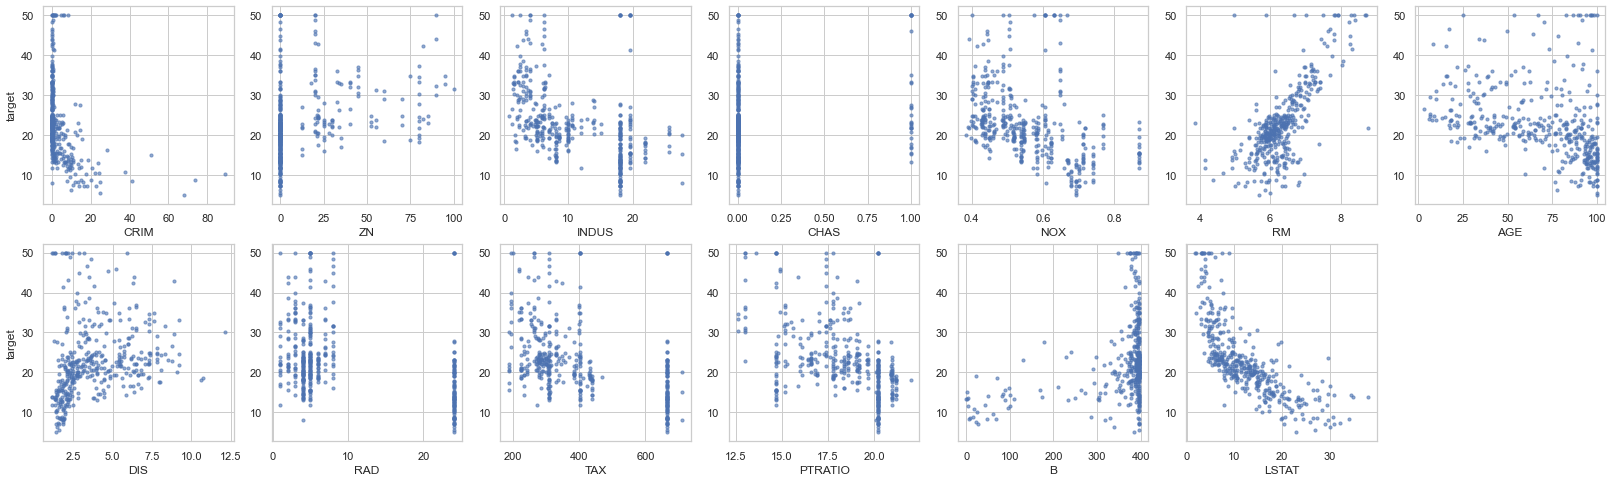

In [36]:
pairplot(x_train, y_train)
plt.show()

Обратите внимание на зависимость цены от признака `LSTAT`. Является ли эта зависимость линейной? А какой? Попробуйте выбрать преобразование для этого признака так, чтобы получившаяся зависимость была более линейной. Добейтесь $R^2$ на тестовой выборке не меньше 0.71.

__Ответ:__ Зависимость целевой переменной от LSTAT похожа на y = exp(-LSTAT), поэтому пролагорифмируем значения LSTAT.

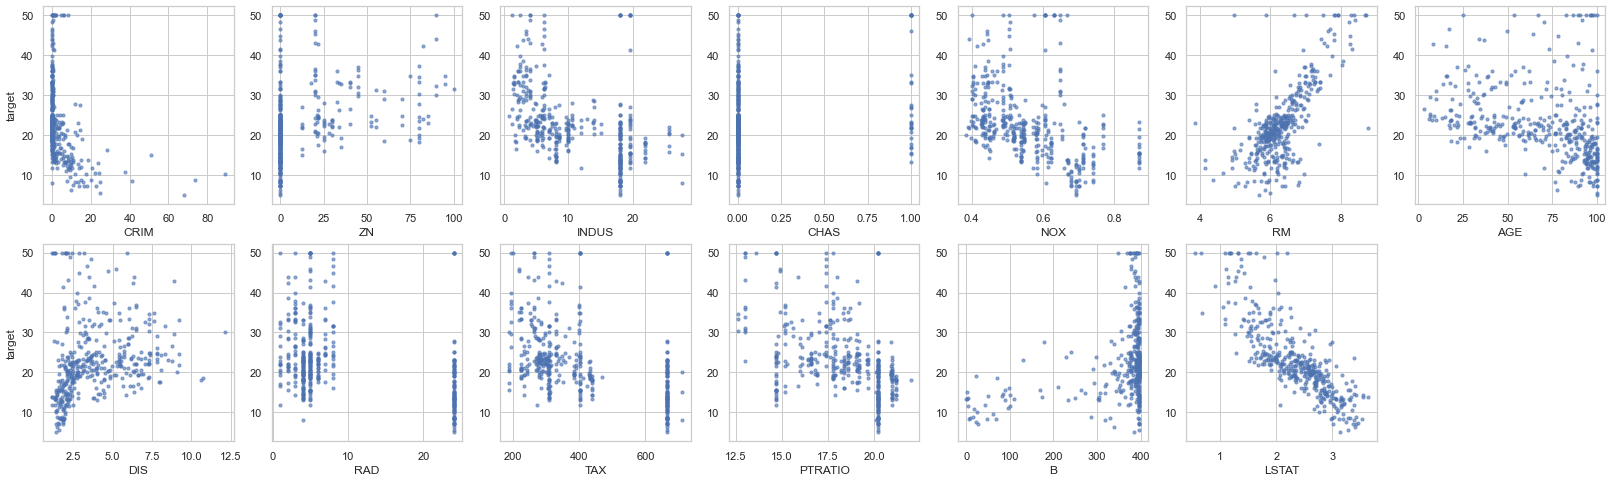

In [37]:
# Сохраним новый набор данных
x_train_new = x_train
x_test_new = x_test
# Изменим данные в столбце LSTAT
x_train_new = x_train_new.assign(LSTAT = np.log(x_train['LSTAT']))
x_test_new = x_test_new.assign(LSTAT = np.log(x_test['LSTAT']))

pairplot(x_train_new, y_train)
plt.show()

In [38]:
# Применим лучшие модели, полученные в предыдущем задании к новому набору данных
# L2-регуляризация с alpha = 1 и стандартизацией признаков
L2 = Ridge(alpha=1)
stand_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

stand_L2 = Pipeline([('stand', stand_scaler), ('L2', L2)]).fit(x_train_new, y_train)
print('L2-регуляризация со стандартизацией признаков на новом наборе, R2:', stand_L2.score(x_test_new, y_test))

# L2-регуляризация с alpha = 0.1 и масштабированием признаков
L2 = Ridge(alpha=0.1)
minmax_L2 = Pipeline([('minmax', minmax_scaler), ('L2', L2)]).fit(x_train_new, y_train)
print('L2-регуляризация с масштабированием признаков на новом наборе, R2:', minmax_L2.score(x_test_new, y_test))

L2-регуляризация со стандартизацией признаков на новом наборе, R2: 0.7445738675614558
L2-регуляризация с масштабированием признаков на новом наборе, R2: 0.74504420319177


__Вывод:__ Качество моделей улучшилось и стало более 0.74 в обоих случаях.

Помимо преобразований отдельных признаков полезными бывают их попарные взаимодействия. Воспользуйтесь PolynomialFeatures, чтобы добавить попарные произведения и квадраты всех признаков. Обучите Ridge-регрессию (подберите гиперпараметр!) и посчитайте $R^2$ на тесте. Сильно ли изменилось качество?

In [42]:
from sklearn.preprocessing import PolynomialFeatures
params = {'L2__alpha': arr_alpha}
L2 = Ridge()
stand_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
poly_features = PolynomialFeatures(degree = 2)

stand_L2 = Pipeline([('poly_features', poly_features),('stand', stand_scaler), ('L2', L2)])
grid_search = GridSearchCV(stand_L2, param_grid=params, cv=kf).fit(x_train_new, y_train)
best_alpha = grid_search.best_params_['L2__alpha'] 
print('Лучшее значение alpha при стандартизации признаков:', best_alpha)
print('R2 на обучающем наборе при лучшем alpha:', grid_search.best_score_)
print('R2 на тестовом наборе при лучшем alpha:', grid_search.score(x_test_new, y_test))
print('R2 для модели при лучшем значении alpha:')
grid_search = GridSearchCV(stand_L2, param_grid={'L2__alpha':[best_alpha]}, cv=kf).fit(x_train_new, y_train)
print('R2 на обучающем наборе при лучшем alpha:', grid_search.best_score_)
print('R2 на тестовом наборе при лучшем alpha:', grid_search.score(x_test_new, y_test))

minmax_L2 = Pipeline([('poly_features', poly_features),('minmax', minmax_scaler), ('L2', L2)])
grid_search = GridSearchCV(minmax_L2, param_grid=params, cv=kf).fit(x_train_new, y_train)
best_alpha = grid_search.best_params_['L2__alpha'] 
print('\nЛучшее значение alpha при стандартизации признаков:', best_alpha)
print('R2 на обучающем наборе при лучшем alpha:', grid_search.best_score_)
print('R2 на тестовом наборе при лучшем alpha:', grid_search.score(x_test_new, y_test))
print('R2 для модели при лучшем значении alpha:')
grid_search = GridSearchCV(minmax_L2, param_grid={'L2__alpha':[best_alpha]}, cv=kf).fit(x_train_new, y_train)
print('R2 на обучающем наборе при лучшем alpha:', grid_search.best_score_)
print('R2 на тестовом наборе при лучшем alpha:', grid_search.score(x_test_new, y_test))

Лучшее значение alpha при стандартизации признаков: 1
R2 на обучающем наборе при лучшем alpha: 0.8320505476708544
R2 на тестовом наборе при лучшем alpha: 0.833314733359975
R2 для модели при лучшем значении alpha:
R2 на обучающем наборе при лучшем alpha: 0.8320505476708544
R2 на тестовом наборе при лучшем alpha: 0.833314733359975

Лучшее значение alpha при стандартизации признаков: 0.1
R2 на обучающем наборе при лучшем alpha: 0.8393960778932547
R2 на тестовом наборе при лучшем alpha: 0.8388485723304684
R2 для модели при лучшем значении alpha:
R2 на обучающем наборе при лучшем alpha: 0.8393960778932547
R2 на тестовом наборе при лучшем alpha: 0.8388485723304684


__Задание 5.__ Оптимальная архитектура, анализ.

При помощи `Pipeline` и `GridSearchCV` выберите оптимальную архитектуру, комбинируя различные методы масштабирования, степень полинома в `PolynomialFeatures`, а также регуляризаторы. Для `Lasso` поставьте максимальное количество итераций больше значения по умолчанию, чтобы оптимизация сошлась.

In [60]:
LR = LinearRegression()
L1 = Lasso(max_iter = 10000)
L2 = Ridge()
stand_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
poly_features = PolynomialFeatures()
best_R2 = 0
best_degree = 50
best_alpha = 0

In [61]:
print('Варинат №1: Линейная регрессия без регуляризации, выбор лучшего сочетания степени от 1 до 4')
method_1 = [('poly_features', poly_features), ('LR', LR)]
params = {'poly_features__degree': [x for x in range(1, 5)]}
grid_1 = GridSearchCV(Pipeline(method_1), cv=kf, param_grid=params).fit(x_train_new, y_train)
best_score = grid_1.best_score_
print('R2 при лучших параметрах модели:', best_score)
print('Лучшее значение степени:', grid_1.best_params_['poly_features__degree'])
print('R2 на тестовом наборе при лучших параметрах модели:', grid_1.score(x_test_new, y_test))
if best_R2 < best_score:
    best_R2 = best_score
    best_model = 'LinearRegression()'
    best_degree = grid_1.best_params_['poly_features__degree']
    best_scaler = 'No'

Варинат №1: Линейная регрессия без регуляризации, выбор лучшего сочетания степени от 1 до 4
R2 при лучших параметрах модели: 0.7759259416667775
Лучшее значение степени: 1
R2 на тестовом наборе при лучших параметрах модели: 0.7450302434403284


In [62]:
print('Варинат №2: Линейная регрессия без регуляризации со стандартизацией признаков, выбор лучшего сочетания степени от 1 до 4')
method_2 = [('poly_features', poly_features), ('stand', stand_scaler), ('LR', LR)]
params = {'poly_features__degree': [x for x in range(1, 5)]}
grid_2 = GridSearchCV(Pipeline(method_2), cv=kf, param_grid=params).fit(x_train_new, y_train)
best_score = grid_2.best_score_
print('R2 при лучших параметрах модели:', best_score)
print('Лучшее значение степени при стандартизации признаков:', grid_2.best_params_['poly_features__degree'])
print('R2 на тестовом наборе при лучших параметрах модели:', grid_2.score(x_test_new, y_test))
if best_R2 < best_score:
    best_R2 = best_score
    best_model = 'LinearRegression()'
    best_degree = grid_2.best_params_['poly_features__degree']
    best_scaler = 'StandardScaler()'

Варинат №2: Линейная регрессия без регуляризации со стандартизацией признаков, выбор лучшего сочетания степени от 1 до 4
R2 при лучших параметрах модели: 0.7759259416667771
Лучшее значение степени при стандартизации признаков: 1
R2 на тестовом наборе при лучших параметрах модели: 0.7450302434403302


In [63]:
print('Варинат №3: Линейная регрессия без регуляризации с масштабированием признаков, выбор лучшего сочетания степени от 1 до 4')
method_3 = [('poly_features', poly_features), ('minmax', minmax_scaler), ('LR', LR)]
params = {'poly_features__degree': [x for x in range(1, 5)]}
grid_3 = GridSearchCV(Pipeline(method_3), cv=kf, param_grid=params).fit(x_train_new, y_train)
best_score = grid_3.best_score_
print('R2 при лучших параметрах модели:', best_score)
print('Лучшее значение степени при масштабировании признаков:', grid_3.best_params_['poly_features__degree'])
print('R2 на тестовом наборе при лучших параметрах модели:', grid_3.score(x_test_new, y_test))
if best_R2 < best_score:
    best_R2 = best_score
    best_model = 'LinearRegression()'
    best_degree = grid_3.best_params_['poly_features__degree']
    best_scaler = 'MinMaxScaler()'

Варинат №3: Линейная регрессия без регуляризации с масштабированием признаков, выбор лучшего сочетания степени от 1 до 4
R2 при лучших параметрах модели: 0.7759259416667772
Лучшее значение степени при масштабировании признаков: 1
R2 на тестовом наборе при лучших параметрах модели: 0.74503024344033


In [64]:
print('Варинат №4: L1-регуляризация, выбор лучшего сочетания степени от 1 до 4, alpha от 10 до 1000')
method_4 = [('poly_features', poly_features), ('L1', L1)]
params = {'L1__alpha': [10 ** x for x in range(1, 4)], 'poly_features__degree': [x for x in range(1, 5)]}
#params = {'L1__alpha': [x*0.01 for x in range(-1, 10)], 'poly_features__degree': [x for x in range(1, 4)]}
grid_4 = GridSearchCV(Pipeline(method_4), cv=kf, param_grid=params).fit(x_train_new, y_train)
best_score = grid_4.best_score_
print('R2 при лучших параметрах модели:', best_score)
print('Лучшее значение alpha:', grid_4.best_params_['L1__alpha'])
print('Лучшее значение степени:', grid_4.best_params_['poly_features__degree'])
print('R2 на тестовом наборе при лучших параметрах модели:', grid_4.score(x_test_new, y_test))
if best_R2 < best_score:
    best_R2 = best_score
    best_model = 'Lasso()'
    best_degree = grid_4.best_params_['poly_features__degree']
    best_alpha = grid_4.best_params_['L1__alpha']
    best_scaler = 'No'

Варинат №4: L1-регуляризация, выбор лучшего сочетания степени от 1 до 4, alpha от 10 до 1000
R2 при лучших параметрах модели: 0.8521123658346103
Лучшее значение alpha: 1000
Лучшее значение степени: 3
R2 на тестовом наборе при лучших параметрах модели: 0.8365927957749426


In [65]:
print('Варинат №5: L1-регуляризация со стандартизацией признаков, выбор лучшего сочетания степени от 1 до 5, alpha от 0.001 до 1.0')
method_5 = [('poly_features', poly_features), ('stand', stand_scaler), ('L1', L1)]
params = {'L1__alpha': [10 ** x for x in range(-3, 1)], 'poly_features__degree': [x for x in range(1, 6)]}
grid_5 = GridSearchCV(Pipeline(method_5), cv=kf, param_grid=params).fit(x_train_new, y_train)
best_score = grid_5.best_score_
print('R2 при лучших параметрах модели:', best_score)
print('Лучшее значение alpha при стандартизации признаков:', grid_5.best_params_['L1__alpha'])
print('Лучшее значение степени при стандартизации признаков:', grid_5.best_params_['poly_features__degree'])
print('R2 на тестовом наборе при лучших параметрах модели:', grid_5.score(x_test_new, y_test))
if best_R2 < best_score:
    best_R2 = best_score
    best_model = 'Lasso()'
    best_degree = grid_5.best_params_['poly_features__degree']
    best_alpha = grid_5.best_params_['L1__alpha']
    best_scaler = 'StandardScaler()'

Варинат №5: L1-регуляризация со стандартизацией признаков, выбор лучшего сочетания степени от 1 до 5, alpha от 0.001 до 1.0
R2 при лучших параметрах модели: 0.8405953958620159
Лучшее значение alpha при стандартизации признаков: 0.01
Лучшее значение степени при стандартизации признаков: 2
R2 на тестовом наборе при лучших параметрах модели: 0.8243911267257764


In [66]:
print('Варинат №6: L1-регуляризация с масштабированием признаков, выбор лучшего сочетания степени от 1 до 4, alpha от 0.0001 до 1.0')
method_6 = [('poly_features', poly_features), ('minmax', minmax_scaler), ('L1', L1)]
params = {'L1__alpha': [10 ** x for x in range(-4, 3)], 'poly_features__degree': [x for x in range(1, 5)]}
grid_6 = GridSearchCV(Pipeline(method_6), cv=kf, param_grid=params).fit(x_train_new, y_train)
best_score = grid_6.best_score_
print('R2 при лучших параметрах модели:', best_score)
print('Лучшее значение alpha при масштабировании признаков:', grid_6.best_params_['L1__alpha'])
print('Лучшее значение степени при масштабировании признаков:', grid_6.best_params_['poly_features__degree'])
print('R2 на тестовом наборе при лучших параметрах модели:', grid_6.score(x_test_new, y_test))
if best_R2 < best_score:
    best_R2 = best_score
    best_model = 'Lasso()'
    best_degree = grid_6.best_params_['poly_features__degree']
    best_alpha = grid_6.best_params_['L1__alpha']
    best_scaler = 'MinMaxScaler()'

Варинат №6: L1-регуляризация с масштабированием признаков, выбор лучшего сочетания степени от 1 до 4, alpha от 0.0001 до 1.0
R2 при лучших параметрах модели: 0.8486405629497493
Лучшее значение alpha при масштабировании признаков: 0.001
Лучшее значение степени при масштабировании признаков: 2
R2 на тестовом наборе при лучших параметрах модели: 0.8321564231189593


In [67]:
print('Варинат №7: L2-регуляризация, выбор лучшего сочетания степени от 1 до 4, alpha от 0.01 до 10000')
method_7 = [('poly_features', poly_features), ('L2', L2)]
params = {'L2__alpha': [10 ** x for x in range(-2, 5)], 'poly_features__degree': [x for x in range(1, 5)]}
grid_7 = GridSearchCV(Pipeline(method_7), cv=kf, param_grid=params).fit(x_train_new, y_train)
best_score = grid_7.best_score_
print('R2 при лучших параметрах модели:', best_score)
print('Лучшее значение alpha:', grid_7.best_params_['L2__alpha'])
print('Лучшее значение степени:', grid_7.best_params_['poly_features__degree'])
print('R2 на тестовом наборе при лучших параметрах модели:', grid_7.score(x_test_new, y_test))
if best_R2 < best_score:
    best_R2 = best_score
    best_model = 'Ridge()'
    best_degree = grid_7.best_params_['poly_features__degree']
    best_alpha = grid_7.best_params_['L2__alpha']
    best_scaler = 'No'

Варинат №7: L2-регуляризация, выбор лучшего сочетания степени от 1 до 4, alpha от 0.01 до 10000
R2 при лучших параметрах модели: 0.8225840965107336
Лучшее значение alpha: 10000
Лучшее значение степени: 2
R2 на тестовом наборе при лучших параметрах модели: 0.832017090455559


In [68]:
print('Варинат №8: L2-регуляризация со стандартизацией признаков, выбор лучшего сочетания степени от 1 до 5, alpha от 0.001 до 10000')
method_8 = [('poly_features', poly_features), ('stand', stand_scaler), ('L2', L2)]
params = {'L2__alpha': [10 ** x for x in range(-3, 5)], 'poly_features__degree': [x for x in range(1, 6)]}
grid_8 = GridSearchCV(Pipeline(method_8), cv=kf, param_grid=params).fit(x_train_new, y_train)
best_score = grid_8.best_score_
print('R2 при лучших параметрах модели:', best_score)
print('Лучшее значение alpha при стандартизации признаков:', grid_8.best_params_['L2__alpha'])
print('Лучшее значение степени при стандартизации признаков:', grid_8.best_params_['poly_features__degree'])
print('R2 на тестовом наборе при лучших параметрах модели:', grid_8.score(x_test_new, y_test))
if best_R2 < best_score:
    best_R2 = best_score
    best_model = 'Ridge()'
    best_degree = grid_8.best_params_['poly_features__degree']
    best_alpha = grid_8.best_params_['L2__alpha']
    best_scaler = 'StandardScaler()'

Варинат №8: L2-регуляризация со стандартизацией признаков, выбор лучшего сочетания степени от 1 до 5, alpha от 0.001 до 10000
R2 при лучших параметрах модели: 0.8320505476708544
Лучшее значение alpha при стандартизации признаков: 1
Лучшее значение степени при стандартизации признаков: 2
R2 на тестовом наборе при лучших параметрах модели: 0.833314733359975


In [69]:
print('Варинат №9: L2-регуляризация с масштабированием признаков, выбор лучшего сочетания степени от 1 до 5, alpha от 0.001 до 10000')
method_9 = [('poly_features', poly_features), ('minmax', minmax_scaler), ('L2', L2)]
params = {'L2__alpha': [10 ** x for x in range(-4, 5)], 'poly_features__degree': [x for x in range(1, 6)]}
grid_9 = GridSearchCV(Pipeline(method_9), cv=kf, param_grid=params).fit(x_train_new, y_train)
best_score = grid_9.best_score_
print('R2 при лучших параметрах модели:', best_score)
print('Лучшее значение alpha при масштабировании признаков:', grid_9.best_params_['L2__alpha'])
print('Лучшее значение степени при масштабировании признаков:', grid_9.best_params_['poly_features__degree'])
print('R2 на тестовом наборе при лучших параметрах модели:', grid_9.score(x_test_new, y_test))
if best_R2 < best_score:
    best_R2 = best_score
    best_model = 'Ridge()'
    best_degree = grid_9.best_params_['poly_features__degree']
    best_alpha = grid_9.best_params_['L2__alpha']
    best_scaler = 'MinMaxScaler()'

Варинат №9: L2-регуляризация с масштабированием признаков, выбор лучшего сочетания степени от 1 до 5, alpha от 0.001 до 10000
R2 при лучших параметрах модели: 0.8393960778932547
Лучшее значение alpha при масштабировании признаков: 0.1
Лучшее значение степени при масштабировании признаков: 2
R2 на тестовом наборе при лучших параметрах модели: 0.8388485723304684


__Вывод:__ Лучшая архитектура имеет следующие параметры:

In [70]:
print('R2 = ', best_R2)
print('Преобразование LSTAT')
print('PolynomialFeatures(', best_degree,')')
print('Scaler:', best_scaler)
print(best_model)
print('alpha =', best_alpha)

R2 =  0.8521123658346103
Преобразование LSTAT
PolynomialFeatures( 3 )
Scaler: No
Lasso()
alpha = 1000


Для одной комбинации метода масштабирования и линейной регрессии постройте зависимость метрики $R^2$ на кросс-валидации (`GridSearchCV.cv_results_['mean_test_score']`) от значения параметра регуляризации для различных степеней полиномов в `PolynomialFeatures`.

In [71]:
models = [('poly_features', poly_features), ('L1', L1)]
arr_poly_degree = [x for x in range(1, 5)]
params = {'L1__alpha': [10], 'poly_features__degree': arr_poly_degree}
grid1 = GridSearchCV(Pipeline(models), cv=kf, param_grid=params, return_train_score=True).fit(x_train_new, y_train)
params = {'L1__alpha': [100], 'poly_features__degree': arr_poly_degree}
grid2 = GridSearchCV(Pipeline(models), cv=kf, param_grid=params, return_train_score=True).fit(x_train_new, y_train)
params = {'L1__alpha': [1000], 'poly_features__degree': arr_poly_degree}
grid3 = GridSearchCV(Pipeline(models), cv=kf, param_grid=params, return_train_score=True).fit(x_train_new, y_train)
params = {'L1__alpha': [10000], 'poly_features__degree': arr_poly_degree}
grid4 = GridSearchCV(Pipeline(models), cv=kf, param_grid=params, return_train_score=True).fit(x_train_new, y_train)

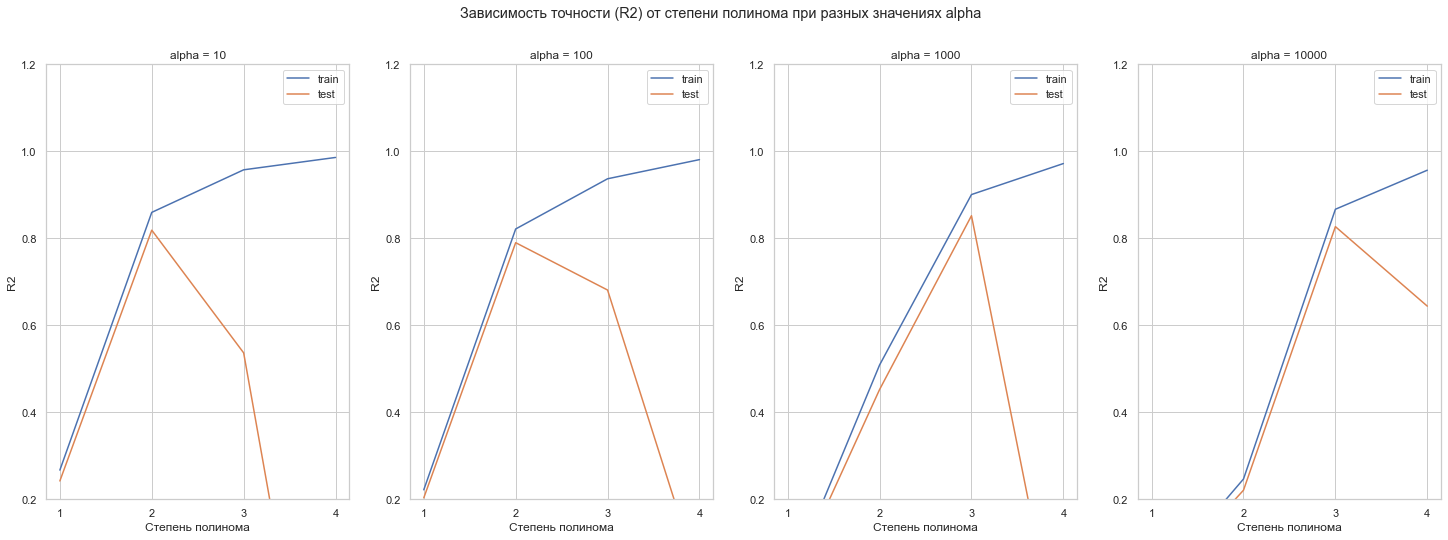

In [73]:
width = 25
height = 8
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(width, height), sharex=True, sharey=True)
fig.suptitle('Зависимость точности (R2) от степени полинома при разных значениях alpha')

# 1-ый график - alpha = 10
ax1 = plt.subplot(141)
plt.plot(arr_poly_degree, grid1.cv_results_['mean_train_score'], label='train') 
plt.plot(arr_poly_degree, grid1.cv_results_['mean_test_score'], label='test') 
plt.xticks(arr_poly_degree)
plt.ylim(0.2, 1.2)
plt.xlabel('Степень полинома')
plt.ylabel('R2')
plt.title('alpha = 10')
plt.legend()
plt.grid(True)

# 2-ой график - alpha = 100
ax2 = plt.subplot(142)
plt.plot(arr_poly_degree, grid2.cv_results_['mean_train_score'], label='train') 
plt.plot(arr_poly_degree, grid2.cv_results_['mean_test_score'], label='test') 
plt.xticks(arr_poly_degree)
plt.ylim(0.2, 1.2)
plt.xlabel('Степень полинома')
plt.ylabel('R2')
plt.title('alpha = 100')
plt.legend()
plt.grid(True)

# 3-ий график - alpha = 1000
ax3 = plt.subplot(143)
plt.plot(arr_poly_degree, grid3.cv_results_['mean_train_score'], label='train') 
plt.plot(arr_poly_degree, grid3.cv_results_['mean_test_score'], label='test') 
plt.xticks(arr_poly_degree)
plt.ylim(0.2, 1.2)
plt.xlabel('Степень полинома')
plt.ylabel('R2')
plt.title('alpha = 1000')
plt.legend()

# 4-ий график - alpha = 10000
ax4 = plt.subplot(144)
plt.plot(arr_poly_degree, grid4.cv_results_['mean_train_score'], label='train') 
plt.plot(arr_poly_degree, grid4.cv_results_['mean_test_score'], label='test') 
plt.xticks(arr_poly_degree)
plt.ylim(0.2, 1.2)
plt.xlabel('Степень полинома')
plt.ylabel('R2')
plt.title('alpha = 10000')
plt.legend()

plt.grid(True)

plt.show()

При каких значениях происходит переобучение? А недообучение? Почему?

__Ответ:__ При значениях alpha = 10; 100 лучшая степень полинома вторая. При дальнейшем росте степени качество модели на обучающем наборе продолжает расти, а на тестовом (валидационном при кросс-валидации) падает, т.е. происходит переобучение модели. При значениях alpha = 1000; 10000 лучшая степень полинома третья. При дальнейшем росте степени качество модели на обучающем наборе продолжает расти, а на тестовом (валидационном при кросс-валидации) падает, т.е. происходит переобучение модели. При первой степени полинома при alpha = 10; 100 и при первой и второй степени полинома при alpha = 1000; 10000 модель недообучена, т.к. при увеличении степени наблюдается увеличение качества и на обучающем, и на тестовом наборах.

In [74]:
models = [('poly_features', poly_features), ('L1', L1)]
L1_alpha = [10, 100, 1000, 10000] 
params = {'L1__alpha': L1_alpha, 'poly_features__degree': [1]}
grid1 = GridSearchCV(Pipeline(models), cv=kf, param_grid=params, return_train_score=True).fit(x_train_new, y_train)
params = {'L1__alpha': L1_alpha, 'poly_features__degree': [2]}
grid2 = GridSearchCV(Pipeline(models), cv=kf, param_grid=params, return_train_score=True).fit(x_train_new, y_train)
params = {'L1__alpha': L1_alpha, 'poly_features__degree': [3]}
grid3 = GridSearchCV(Pipeline(models), cv=kf, param_grid=params, return_train_score=True).fit(x_train_new, y_train)
params = {'L1__alpha': L1_alpha, 'poly_features__degree': [4]}
grid4 = GridSearchCV(Pipeline(models), cv=kf, param_grid=params, return_train_score=True).fit(x_train_new, y_train)

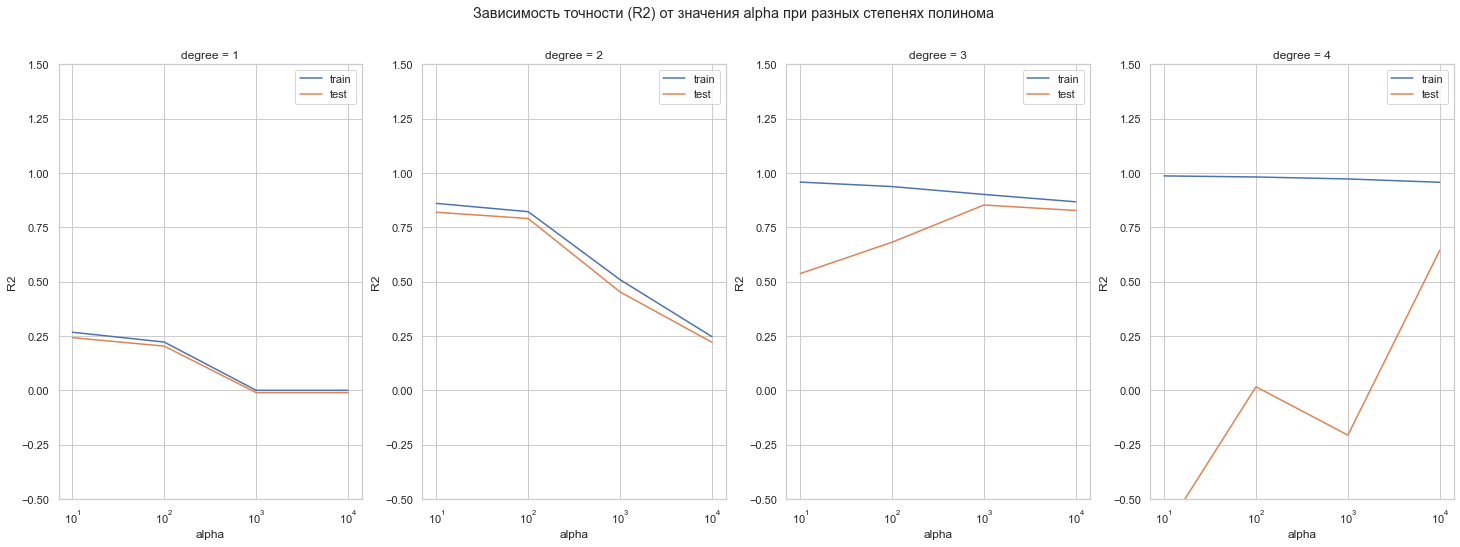

In [75]:
width = 25
height = 8
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(width, height), sharex=True, sharey=True)
fig.suptitle('Зависимость точности (R2) от значения alpha при разных степенях полинома')

# 1-ый график - degree = 1
ax1 = plt.subplot(141)
plt.semilogx(L1_alpha, grid1.cv_results_['mean_train_score'], label='train') 
plt.semilogx(L1_alpha, grid1.cv_results_['mean_test_score'], label='test') 
plt.xticks(L1_alpha)
plt.ylim(-0.5, 1.5)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title('degree = 1')
plt.legend()

# 2-ой график - degree = 2
ax2 = plt.subplot(142)
plt.semilogx(L1_alpha, grid2.cv_results_['mean_train_score'], label='train') 
plt.semilogx(L1_alpha, grid2.cv_results_['mean_test_score'], label='test') 
plt.xticks(L1_alpha)
plt.ylim(-0.5, 1.5)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title('degree = 2')
plt.legend()

# 3-ий график - degree = 3
ax3 = plt.subplot(143)
plt.semilogx(L1_alpha, grid3.cv_results_['mean_train_score'], label='train') 
plt.semilogx(L1_alpha, grid3.cv_results_['mean_test_score'], label='test') 
plt.xticks(L1_alpha)
plt.ylim(-0.5, 1.5)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title('degree = 3')
plt.legend()

# 4-ий график - degree = 4
ax4 = plt.subplot(144)
plt.semilogx(L1_alpha, grid4.cv_results_['mean_train_score'], label='train') 
plt.semilogx(L1_alpha, grid4.cv_results_['mean_test_score'], label='test') 
plt.xticks(L1_alpha)
plt.ylim(-0.5, 1.5)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title('degree = 4')
plt.legend()

plt.grid(True)
plt.show()

__Ответ:__ При степенях полинома = 1; 2 лучшее значение alpha = 10, при дальнейшем увеличении качество падает. Снижение качества и на обучающем и на тестовом наборах может говорить о недостаточной сложности модели и ее недообучении или о проблемах с данными (нелинейные зависимости пытаемся описать с помощью линейной регрессии). При степени полинома = 3 лучший результат достигается при alpha равном 1000, при дальнейшем увеличении alpha качество модели на тестовом наборе снижается. При степени = 4 наблюдается недообучение модели.